# <span style="color:orange">Handwritten Digit Classification</span>

### Load the Dataset

In [1]:
import pandas as pd

train_csv_path = r'E:\Codex Cue Deep Learning Internship\Project 1\mnist_train.csv'
test_csv_path = r'E:\Codex Cue Deep Learning Internship\Project 1\mnist_test.csv'

train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)
print("Training Data")
print(train_data.head())
print("Testing Data")
print(test_data.head())


Training Data
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
Testing Data
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  .

### Separate Features and Labels

In [2]:
X_train = train_data.drop('label', axis=1)  
y_train = train_data['label']  
X_test = test_data.drop('label', axis=1)  
y_test = test_data['label']  

### Reshape and Normalize the Features

In [3]:
import numpy as np

X_train = X_train.values.reshape(-1, 28, 28, 1)
X_train = X_train.astype('float32') / 255.0 
X_test = X_test.values.reshape(-1, 28, 28, 1)  
X_test = X_test.astype('float32') / 255.0 

### Convert Labels to Categorical Format

In [4]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Build and Train a CNN Model

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Define the input shape
inputs = Input(shape=(28, 28, 1))

# Model architecture
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Evaluate the Model

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1292 - loss: 2.2997
Test accuracy: 0.13289999961853027


### Model Optimization 

In [7]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input

train_csv_path = r'E:\Codex Cue Deep Learning Internship\Project 1\mnist_train.csv'
test_csv_path = r'E:\Codex Cue Deep Learning Internship\Project 1\mnist_test.csv'

train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

X_train = train_data.drop(columns=['label']).values.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(train_data['label'].values)

X_test = test_data.drop(columns=['label']).values.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_test = to_categorical(test_data['label'].values)

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history = model.fit(X_train, y_train,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')



Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - accuracy: 0.9140 - loss: 0.2852 - val_accuracy: 0.9695 - val_loss: 0.0910
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9857 - loss: 0.0447 - val_accuracy: 0.9868 - val_loss: 0.0409
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9910 - loss: 0.0281 - val_accuracy: 0.9901 - val_loss: 0.0307
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9940 - loss: 0.0190 - val_accuracy: 0.9899 - val_loss: 0.0367
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9952 - loss: 0.0153 - val_accuracy: 0.9898 - val_loss: 0.0333
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9966 - loss: 0.0100 - val_accuracy: 0.9917 - val_loss: 0.0286
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9973 - loss: 0.0079 - val_accuracy: 0.9899 - val_loss: 0.0384
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9975 -

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9890 - loss: 0.0356
Test accuracy: 0.9916999936103821


### Visulization 

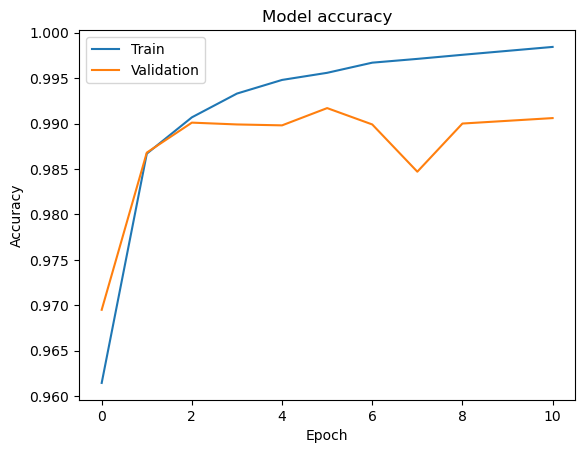

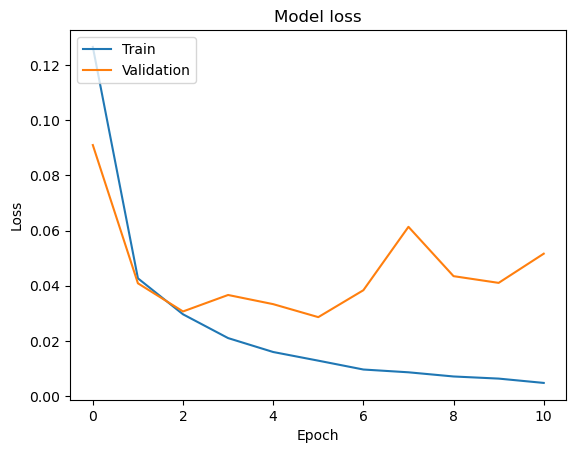

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


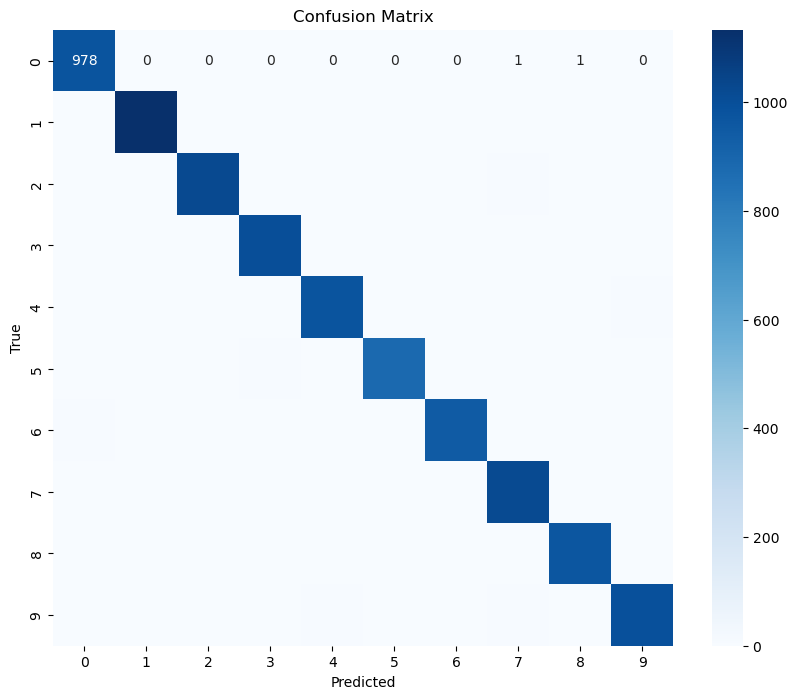

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


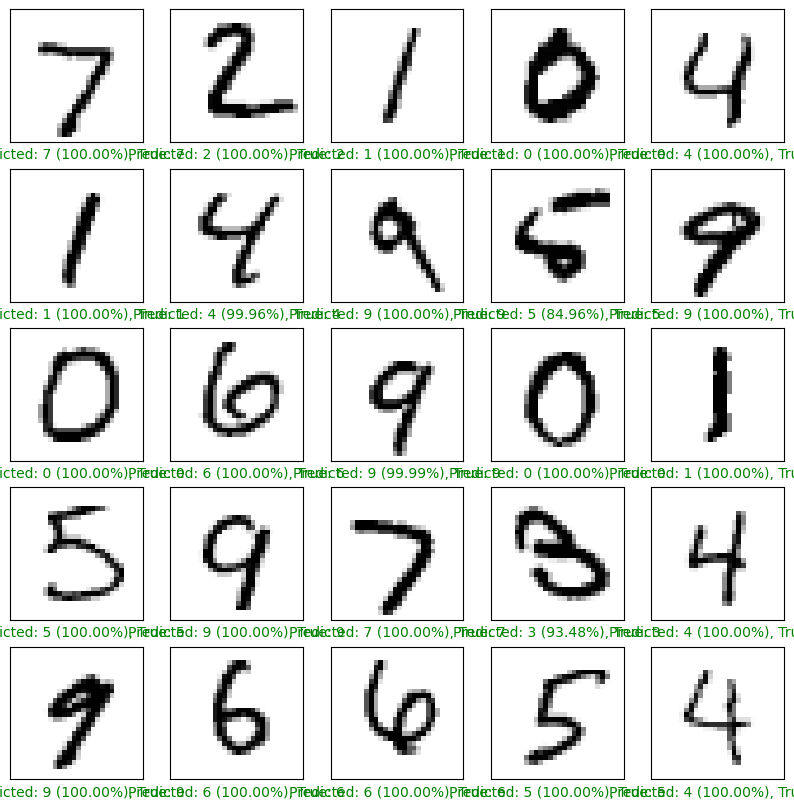

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(y_pred[i])
    true_label = np.argmax(y_test[i])
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Predicted: {predicted_label} ({100*np.max(y_pred[i]):.2f}%), True: {true_label}', color=color)
plt.show()
